In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

sns.set_style('ticks')

%load_ext autoreload
%autoreload 2

# Завдання:
## 1. Для експериментальних даних, наведених у лабораторній роботі №4, розрахувати параметри залежності $y=f(x_2)$
## 2. Отримати регресійну модель виду $y=f(x_1,x_2)$
## 3. Визначити залишкові дисперсії кожної з моделей
## 4. Отримати графіки залишків, розрахувати їхнї середні значення та дисперсії

In [2]:
x1 = np.array([85.5, 81.7, 71.7, 62.7, 66.4, 70.6, 65.0, 72.8, 67.6, 90.2, 60.2, 74.8, 63.4, 74.2, 71.6, 60.9, 81.1, 71.5, 77.2, 91.2])
x2 = np.array([255, 341, 373, 447, 446, 410, 495, 451, 565, 354, 549, 328, 555, 415, 415, 527, 379, 439, 350, 278])
y = np.array([17.3, 19.8, 30.1, 31.9, 38.3, 26.5, 36.2, 21.0, 29.5, 24.9, 25.0, 28.0, 33.9, 16.1, 21.0, 28.7, 30.3, 19.9, 22.6, 20.1])

## Регресійна модель $y=f(x_2)$

B0 (Intercept): 11.369795382500861
B1 (Slope): 0.035081711938602794
Residual Variance: 31.86761786173632
Residual Mean: 9.059419880941277e-15


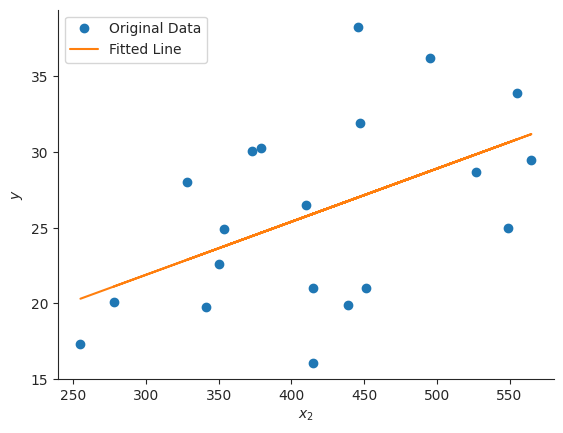

In [6]:
res = OLS(y, add_constant(x2[:, None])).fit()
b0, b1 = res.params
print('B0 (Intercept):', b0)
print('B1 (Slope):', b1)
print('Residual Variance:', np.sum(res.resid ** 2) / res.df_resid)
print('Residual Mean:', res.resid.mean())

plt.plot(x2, y, 'o', label='Original Data')
plt.plot(x2, b0 + b1 * x2, label='Fitted Line')
plt.xlabel('$x_2$')
plt.ylabel('$y$')
plt.legend()
sns.despine()
plt.show()

## Регресійна Модель $y=f(x_1, x_2)$

B0: 46.230551186334466
B1: -0.31740666207277796
B2: 0.0071664984350440705
Residual Variance: 31.160822623437078
Residual Mean: -3.144151605738443e-14


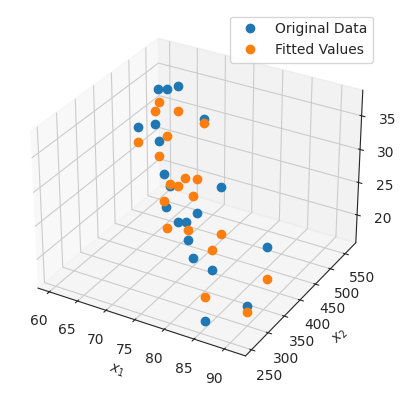

In [7]:
res = OLS(y, add_constant(np.column_stack([x1, x2]))).fit()
b0, b1, b2 = res.params
print('B0:', b0)
print('B1:', b1)
print('B2:', b2)
print('Residual Variance:', np.sum(res.resid ** 2) / res.df_resid)
print('Residual Mean:', res.resid.mean())

ax = plt.axes(projection='3d')
ax.plot3D(x1, x2, y, 'o', label='Original Data')
ax.plot3D(x1, x2, res.fittedvalues, 'o', label='Fitted Values')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
plt.legend()
plt.show()